# 金融分控特征工程之特征构造学习目标
- 知道未来信息的概念，及处理未来信息的方法
- 掌握从原始数据构造出新的特征的方法
- 掌握特征变换的方法
- 掌握缺失值处理的方法

# 1、什么是特征变换？
> 特征构造过程中，对特征做分箱处理时必不可少的过程，分箱就是将连续变量离散化，合并成较少的状态

# 2、特征分箱的作用是什么？
- 离散特征的增加和较少都很容易，易于模型的快速迭代
- 稀疏向量內积乘法运算快，计算结果方便存储，易于扩展
- 分箱（离散化）后的特征对异常数据有很强的鲁棒性
- 单变量分箱（离散化）为N个，每个单变量有独特的权重，相当于为模型引入了非线性，能够提升模型表达能力
- 分箱（离散化）后可以进行特征交叉，由M+N个变量变为M*N个变量，进一步引入非线性，提升表达能力
- 分箱（离散化）后，模型会更加稳定，对于年龄离散化，20～30为一个区间，不行因为年龄+1就变成一个新特征
- 特征离散化可以讲缺失作为独立的一类带入模型
- 

# 3、常见的特征分箱方法有哪些，分别有哪些特点？
- 卡方分箱：
    - 将数据按照等频和等距分箱后，计算卡方值，将卡放只较小的乡邻的箱体合并，使得不同箱体的好坏样本比例区别放大，容易获得高IV（Information Value）
    - 卡方分箱是利用独立性检验来挑选箱划分节点的阈值，卡方分箱过程可以拆氛围初始化和合并两个步骤
        - 初始化：根据连续变量值大小进行排序，构建最初的离散化
        - 合并：便利相邻两项的卡方值，将卡方数据最小的两组合并，不断的重复直到满足分箱数目要求
    - 
- 决策树分箱：
    - 自动适应数据特征：无需预处理：决策树分箱不需要对数据进行预处理和归一化，能够自适应地处理离散和连续变量，并根据数据的实际情况进行分箱。
    - 处理高维数据：高维数据支持：决策树分箱能够处理高维数据，并将其离散化为少数几个变量，从而提高模型的效率和稳定性。
    - 提高模型可解释性：可视化分箱过程：决策树分箱能够将模型的分箱过程可视化，提高模型的可解释性。通过决策树的规则，可以直观地看到每个分箱的边界和对应的特征值。
    - 简化分箱工作量：减少人为干预：使用决策树进行分箱可以大大简化分箱工作量，显著减少人为不确定因素造成的影响。分箱作为一项工程，通过决策树来进行分箱，能够在对数据的熟悉程度尚浅时，通过相关决策算法机制，挖掘出数据中蕴含的关键信息。
    - 依赖决策树质量：分箱结果依赖于决策树：决策树分箱的结果依赖于决策树的质量。如果决策树构造不好，分箱结果可能不准确。因此，需要选择合适的决策树参数，如 max_depth、min_samples_leaf 等，以确保分箱结果的准确性和稳定性。
    - 箱数选择困难：箱数选择：决策树分箱需要选择合适的箱（叶节点）数，而这个选择比较困难，需要根据具体问题进行判断。通常可以通过调整决策树的参数来控制箱数
- 等频分箱：
    - 按数据分布，均匀切分，，每个箱体内样本数量一样
    - 在样本较少情况下，泛化能力较差
    - 在样本不均衡时可能无法分箱
    - 特征分析常用等频分箱
- 等距分箱：
    - 按照数据的特征值的间距均匀切分，每个箱体的数值距离一样
    - 一定可以分箱
    - 无法保证箱体样本数量均匀
    - 信用分统计时常用等距分箱
- 聚类分箱
- 其他分箱：


# 小结
- 特征工程准备工作
    - ER图
    - 样本设计表
    - 特征框架表
- 特征构造方法
    - 用户静态信息特征
    - 用户时间截面特征
    - 用户时间序列特征
    - 用户关联特征
- 缺失值处理
    - 补零
    - 风险趋势
    - 增加缺失特征
    - 业务默认值
- 未来信息处理
    - 快照表
    - 将数据分却成是否包含未来信息分别处理
- 特征构造标准
    - 简单
    - 归纳 + 演绎

    







In [1]:
# 导入Pandas包
import pandas as pd
# 导入numpy包
import numpy as np

# 加载数据
data = pd.read_excel('./file/textdata.xlsx')
'''
数据信息：
    数据条目：5
    字段数量：26
    为空字段：ft2、ft8、ft9、ft10、ft11、ft12、gt2、gt8、gt9、gt10、gt11、gt12
    字段类型：float64(12), int64(14)
    占用内存：1.1kB
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  5 non-null      int64  
 1   ft1          5 non-null      int64  
 2   ft2          4 non-null      float64
 3   ft3          5 non-null      int64  
 4   ft4          5 non-null      int64  
 5   ft5          5 non-null      int64  
 6   ft6          5 non-null      int64  
 7   ft7          5 non-null      int64  
 8   ft8          3 non-null      float64
 9   ft9          3 non-null      float64
 10  ft10         1 non-null      float64
 11  ft11         0 non-null      float64
 12  ft12         0 non-null      float64
 13  TOB          5 non-null      int64  
 14  gt1          5 non-null      int64  
 15  gt2          4 non-null      float64
 16  gt3          5 non-null      int64  
 17  gt4          5 non-null      int64  
 18  gt5          5 non-null      int64  
 19  gt6         

In [25]:
'''
loc[row_label, column_label]
row_label：可以是单个行标签、行标签列表、行标签范围等。
column_label：可以是单个列标签、列标签列表等。
'''


def Num(ft, p):
    '''
    计算最近P个月特征大于0的月份数
    :param ft: 
    :param p: 
    :return: 
    '''
    df = data.loc[:, ft + '1': ft + str(p)]
    auto_value = np.where(df > 0, 1, 0).sum(axis=1)
    temp = ft + '_num' + str(p)
    return temp, auto_value

In [18]:
#最近p个月，ft=0的月份数
def zero_cnt(ft, p):
    '''
    计算最近P个月特征ft等于0的月份数
    :param ft: 
    :param p: 
    :return: 
    '''
    df = data.loc[:, ft + '1':ft + str(p)]
    auto_value = np.where(df == 0, 1, 0).sum(axis=1)
    return ft + '_zero_cnt' + str(p), auto_value

In [20]:
def Evr(ft, p):
    '''
    计算近p个月特征ft大于0的月份数是否大于等于1
    :param ft: 
    :param p: 
    :return: 
    '''
    df = data.loc[:, ft + '1':ft + str(p)]
    arr = np.where(df > 0, 1, 0).sum(axis=1)
    auto_value = np.where(arr, 1, 0)
    return ft + '_evr' + str(p), auto_value

In [21]:
def Avg(ft, p):
    '''
    计算最近p个月特征ft的均值
    :param ft: 
    :param p: 
    :return: 
    '''
    df = data.loc[:, ft + '1':ft + str(p)]
    auto_value = np.nanmean(df, axis=1)
    return ft + '_avg' + str(p), auto_value

In [22]:
'''
计算最近p个月特征ft的和，最大值，最小值
'''


def Tot(ft, p):
    '''
    最近p个月，ft和
    :param ft: 
    :param p: 
    :return: 
    '''
    df = data.loc[:, ft + '1':ft + str(p)]
    auto_value = np.nansum(df, axis=1)
    return ft + '_tot' + str(p), auto_value


def Tot2T(ft, p):
    '''
    最近(2,p+1)个月，ft和
    :param ft: 
    :param p: 
    :return: 
    '''
    df = data.loc[:, ft + '2':ft + str(p + 1)]
    auto_value = df.sum(1)
    return ft + '_tot2t' + str(p), auto_value


def Max(ft, p):
    '''
    最近p个月，ft最大值
    :param ft: 
    :param p: 
    :return: 
    '''
    df = data.loc[:, ft + '1':ft + str(p)]
    auto_value = np.nanmax(df, axis=1)
    return ft + '_max' + str(p), auto_value


def Min(ft, p):
    '''
    最近p个月，ft最小值
    :param ft: 
    :param p: 
    :return: 
    '''
    df = data.loc[:, ft + '1':ft + str(p)]
    auto_value = np.nanmin(df, axis=1)
    return ft + '_min' + str(p), auto_value

In [47]:
'''
其余衍生方法
'''

def Msg(ft,p):
    '''
    最近p个月，最近一次ft>0到现在的月份数
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    df_value=np.where(df>0,1,0)
    auto_value=[]
    for i in range(len(df_value)):
        row_value=df_value[i,:]
        if row_value.max()<=0:
            indexs='0'
            auto_value.append(indexs)
        else:
            indexs=1
            for j in row_value:
                if j>0:
                    break
                indexs+=1
            auto_value.append(indexs)
    return ft+'_msg'+str(p),auto_value


def Msz(ft,p):
    '''
    最近p个月，最近一次ft=0到现在的月份数
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    df_value=np.where(df==0,1,0)
    auto_value=[]
    for i in range(len(df_value)):
        row_value=df_value[i,:]
        if row_value.max()<=0:
            indexs='0'
            auto_value.append(indexs)
        else:
            indexs=1
            for j in row_value:
                if j>0:
                    break
                indexs+=1
            auto_value.append(indexs)
    return ft+'_msz'+str(p),auto_value

def Cav(ft,p):
    '''
    当月ft/(最近p个月ft的均值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = df[ft+'1']/np.nanmean(df,axis = 1 )
    return ft+'_cav'+str(p),auto_value

def Cmn(ft,p):
    '''
    当月ft/(最近p个月ft的最小值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = df[ft+'1']/np.nanmin(df,axis = 1 )
    return ft+'_cmn'+str(p),auto_value

def Mai(ft,p):
    '''
    最近p个月，每两个月间的ft的增长量的最大值
    :param ft: 
    :param p: 
    :return: 
    '''
    arr=np.array(data.loc[:,ft+'1':ft+str(p)])
    auto_value = []
    for i in range(len(arr)):
        df_value = arr[i,:]
        value_lst = []
        for k in range(len(df_value)-1):
            minus = df_value[k] - df_value[k+1]
            value_lst.append(minus)
        auto_value.append(np.nanmax(value_lst))
    return ft+'_mai'+str(p),auto_value

def Mad(ft,p):
    '''
    最近p个月，每两个月间的ft的减少量的最大值
    :param ft: 
    :param p: 
    :return: 
    '''
    arr=np.array(data.loc[:,ft+'1':ft+str(p)])
    auto_value = []
    for i in range(len(arr)):
        df_value = arr[i,:]
        value_lst = []
        for k in range(len(df_value)-1):
            minus = df_value[k+1] - df_value[k]
            value_lst.append(minus)
        auto_value.append(np.nanmax(value_lst))
    return ft+'_mad'+str(p),auto_value

def Std(ft,p):
    '''
    最近p个月，ft的标准差
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value=np.nanvar(df,axis = 1)
    return ft+'_std'+str(p),auto_value

def Cva(ft,p):
    '''
    最近p个月，ft的变异系数
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value=np.nanvar(df,axis = 1)/(np.nanmean(df,axis = 1 )+1e-10)
    return ft+'_cva'+str(p),auto_value

def Cmm(ft,p):
    '''
    (当月ft) - (最近p个月ft的均值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = df[ft+'1'] - np.nanmean(df,axis = 1 )
    return ft+'_cmm'+str(p),auto_value

def Cnm(ft,p):
    '''
    (当月ft) - (最近p个月ft的最小值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = df[ft+'1'] - np.nanmin(df,axis = 1 )
    return ft+'_cnm'+str(p),auto_value

def Cxm(ft,p):
    '''
    (当月ft) - (最近p个月ft的最大值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = df[ft+'1'] - np.nanmax(df,axis = 1 )
    return ft+'_cxm'+str(p),auto_value


def Cxp(ft,p):
    '''
    ((当月ft) - (最近p个月ft的最大值) ） / (最近p个月ft的最大值))
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    temp = np.nanmax(df,axis = 1 )
    auto_value = (df[ft+'1'] - temp )/ temp
    return ft+'_cxp'+str(p),auto_value

def Ran(ft,p):
    '''
    最近p个月，ft的极差
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = np.nanmax(df,axis = 1 )  -  np.nanmin(df,axis = 1 )
    return ft+'_ran'+str(p),auto_value

def Nci(ft,p):
    '''
    最近p个月中，特征ft的值，后一个月相比于前一个月增长了的月份数
    :param ft: 
    :param p: 
    :return: 
    '''
    arr=np.array(data.loc[:,ft+'1':ft+str(p)])
    auto_value = []
    for i in range(len(arr)):
        df_value = arr[i,:]
        value_lst = []
        for k in range(len(df_value)-1):
            minus = df_value[k] - df_value[k+1]
            value_lst.append(minus)
        value_ng = np.where(np.array(value_lst)>0,1,0).sum()
        auto_value.append(np.nanmax(value_ng))
    return ft+'_nci'+str(p),auto_value

def Ncd(ft,p):
    '''
    最近p个月中，特征ft的值，后一个月相比于前一个月减少了的月份数
    :param ft: 
    :param p: 
    :return: 
    '''
    arr=np.array(data.loc[:,ft+'1':ft+str(p)])
    auto_value = []
    for i in range(len(arr)):
        df_value = arr[i,:]
        value_lst = []
        for k in range(len(df_value)-1):
            minus = df_value[k] - df_value[k+1]
            value_lst.append(minus)
        value_ng = np.where(np.array(value_lst)<0,1,0).sum()
        auto_value.append(np.nanmax(value_ng))
    return ft+'_ncd'+str(p),auto_value

def Ncn(ft,p):
    '''
    最近p个月中，相邻月份ft 相等的月份数
    :param ft: 
    :param p: 
    :return: 
    '''
    arr=np.array(data.loc[:,ft+'1':ft+str(p)])
    auto_value = []
    for i in range(len(arr)):
        df_value = arr[i,:]
        value_lst = []
        for k in range(len(df_value)-1):
            minus = df_value[k] - df_value[k+1]
            value_lst.append(minus)
        value_ng = np.where(np.array(value_lst)==0,1,0).sum()
        auto_value.append(np.nanmax(value_ng))
    return ft+'_ncn'+str(p),auto_value

def Bup(ft,p):
    '''
    最近P个月中，特征ft的值是否按月份严格递增，是返回1，否返回0
    :param ft: 
    :param p: 
    :return: 
    '''
    arr=np.array(data.loc[:,ft+'1':ft+str(p)])
    auto_value = []
    for i in range(len(arr)):
        df_value = arr[i,:]
        value_lst = []
        index = 0
        for k in range(len(df_value)-1):
            if df_value[k] > df_value[k+1]:
                break
            index =+ 1
        if index == p:
            value= 1
        else:
            value = 0
        auto_value.append(value)
    return ft+'_bup'+str(p),auto_value

def Pdn(ft,p):
    '''
    最近P个月中，特征ft的值是否按月份严格递减，是返回1，否返回0
    :param ft: 
    :param p: 
    :return: 
    '''
    arr=np.array(data.loc[:,ft+'1':ft+str(p)])
    auto_value = []
    for i in range(len(arr)):
        df_value = arr[i,:]
        value_lst = []
        index = 0
        for k in range(len(df_value)-1):
            if df_value[k+1] > df_value[k]:
                break
            index =+ 1
        if index == p:
            value= 1
        else:
            value = 0
        auto_value.append(value)
    return ft+'_pdn'+str(p),auto_value

def Trm(ft,p):
    '''
    最近P个月中，ft的切尾均值，这里去掉了数据中的最大值和最小值
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = []
    for i in range(len(df)):
        trm_mean = list(df.loc[i,:])
        trm_mean.remove(np.nanmax(trm_mean))
        trm_mean.remove(np.nanmin(trm_mean))
        temp=np.nanmean(trm_mean)
        auto_value.append(temp)
    return ft+'_trm'+str(p),auto_value

def Cmx(ft,p):
    '''
    当月ft / 最近p个月的ft中的最大值
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = (df[ft+'1'] - np.nanmax(df,axis = 1 )) /np.nanmax(df,axis = 1 )
    return ft+'_cmx'+str(p),auto_value

def Cmp(ft,p):
    '''
    ( 当月ft - 最近p个月的ft均值 ) / ft均值
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = (df[ft+'1'] - np.nanmean(df,axis = 1 )) /np.nanmean(df,axis = 1 )
    return ft+'_cmp'+str(p),auto_value

def Cnp(ft,p):
    '''
    ( 当月ft - 最近p个月的ft最小值 ) /ft最小值 
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    auto_value = (df[ft+'1'] - np.nanmin(df,axis = 1 )) /np.nanmin(df,axis = 1 )
    return ft+'_cnp'+str(p),auto_value

def Msx(ft,p):
    '''
    最近p个月取最大值的月份距现在的月份数
    :param ft: 
    :param p: 
    :return: 
    '''
    df=data.loc[:,ft+'1':ft+str(p)]
    df['_max'] = np.nanmax(df,axis = 1)
    for i in range(1,p+1):
        df[ft+str(i)] = list(df[ft+str(i)] == df['_max'])
    del df['_max']
    df_value = np.where(df==True,1,0)
    auto_value=[]
    for i in range(len(df_value)):
        row_value=df_value[i,:]
        indexs=1
        for j in row_value:
            if j == 1:
                break
            indexs+=1
        auto_value.append(indexs)
    return ft+'_msx'+str(p),auto_value


def Rpp(ft,p):
    '''
    最近p个月的均值/((p,2p)个月的ft均值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df1=data.loc[:,ft+'1':ft+str(p)]
    value1=np.nanmean(df1,axis = 1 )
    df2=data.loc[:,ft+str(p):ft+str(2*p)]
    value2=np.nanmean(df2,axis = 1 )
    auto_value = value1/value2
    return ft+'_rpp'+str(p),auto_value


def Dpp(ft,p):
    '''
    最近p个月的均值 - ((p,2p)个月的ft均值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df1=data.loc[:,ft+'1':ft+str(p)]
    value1=np.nanmean(df1,axis = 1 )
    df2=data.loc[:,ft+str(p):ft+str(2*p)]
    value2=np.nanmean(df2,axis = 1 )
    auto_value = value1 - value2
    return ft+'_dpp'+str(p),auto_value


def Mpp(ft,p):
    '''
    (最近p个月的ft最大值)/ (最近(p,2p)个月的ft最大值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df1=data.loc[:,ft+'1':ft+str(p)]
    value1=np.nanmax(df1,axis = 1 )
    df2=data.loc[:,ft+str(p):ft+str(2*p)]
    value2=np.nanmax(df2,axis = 1 )
    auto_value = value1/value2
    return ft+'_mpp'+str(p),auto_value


def Npp(ft,p):
    '''
    (最近p个月的ft最小值)/ (最近(p,2p)个月的ft最小值)
    :param ft: 
    :param p: 
    :return: 
    '''
    df1=data.loc[:,ft+'1':ft+str(p)]
    value1=np.nanmin(df1,axis = 1 )
    df2=data.loc[:,ft+str(p):ft+str(2*p)]
    value2=np.nanmin(df2,axis = 1 )
    auto_value = value1/value2
    return ft+'_npp'+str(p),auto_value

In [48]:
#定义批量调用双参数的函数        
def auto_var2(feature,p):
    #global data_new
    try:
        columns_name,values=Num(feature,p)
        data_new[columns_name]=values
    except:
        print("Num PARSE ERROR",feature,p)
    try:
        columns_name,values=Nmz(feature,p)
        data_new[columns_name]=values
    except:
        print("Nmz PARSE ERROR",feature,p)
    try:
        columns_name,values=Evr(feature,p)
        data_new[columns_name]=values
    except:
        print("Evr PARSE ERROR",feature,p)
    try:
        columns_name,values=Avg(feature,p)
        data_new[columns_name]=values
    except:
        print("Avg PARSE ERROR",feature,p)
    try:
        columns_name,values=Tot(feature,p)
        data_new[columns_name]=values
    except:
        print("Tot PARSE ERROR",feature,p)
    try:
        columns_name,values=Tot2T(feature,p)
        data_new[columns_name]=values
    except:
        print("Tot2T PARSE ERROR",feature,p)
    try:
        columns_name,values=Max(feature,p)
        data_new[columns_name]=values
    except:
        print("Tot PARSE ERROR",feature,p)
    try:
        columns_name,values=Max(feature,p)
        data_new[columns_name]=values
    except:
        print("Max PARSE ERROR",feature,p)
    try:
        columns_name,values=Min(feature,p)
        data_new[columns_name]=values
    except:
        print("Min PARSE ERROR",feature,p)
    try:
        columns_name,values=Msg(feature,p)
        data_new[columns_name]=values
    except:
        print("Msg PARSE ERROR",feature,p)
    try:
        columns_name,values=Msz(feature,p)
        data_new[columns_name]=values
    except:
        print("Msz PARSE ERROR",feature,p)
    try:
        columns_name,values=Cav(feature,p)
        data_new[columns_name]=values
    except:
        print("Cav PARSE ERROR",feature,p)
    try:
        columns_name,values=Cmn(feature,p)
        data_new[columns_name]=values
    except:
        print("Cmn PARSE ERROR",feature,p)
    try:
        columns_name,values=Std(feature,p)
        data_new[columns_name]=values
    except:
        print("Std PARSE ERROR",feature,p)
    try:
        columns_name,values=Cva(feature,p)
        data_new[columns_name]=values
    except:
        print("Cva PARSE ERROR",feature,p)
    try:
        columns_name,values=Cmm(feature,p)
        data_new[columns_name]=values
    except:
        print("Cmm PARSE ERROR",feature,p)
    try:
        columns_name,values=Cnm(feature,p)
        data_new[columns_name]=values
    except:
        print("Cnm PARSE ERROR",feature,p)
    try:
        columns_name,values=Cxm(feature,p)
        data_new[columns_name]=values
    except:
        print("Cxm PARSE ERROR",feature,p)
    try:
        columns_name,values=Cxp(feature,p)
        data_new[columns_name]=values
    except:
        print("Cxp PARSE ERROR",feature,p)
    try:
        columns_name,values=Ran(feature,p)
        data_new[columns_name]=values
    except:
        print("Ran PARSE ERROR",feature,p)
    try:
        columns_name,values=Nci(feature,p)
        data_new[columns_name]=values
    except:
        print("Nci PARSE ERROR",feature,p)
    try:
        columns_name,values=Ncd(feature,p)
        data_new[columns_name]=values
    except:
        print("Ncd PARSE ERROR",feature,p)
    try:
        columns_name,values=Ncn(feature,p)
        data_new[columns_name]=values
    except:
        print("Ncn PARSE ERROR",feature,p)
    try:
        columns_name,values=Pdn(feature,p)
        data_new[columns_name]=values
    except:
        print("Pdn PARSE ERROR",feature,p)
    try:
        columns_name,values=Cmx(feature,p)
        data_new[columns_name]=values
    except:
        print("Cmx PARSE ERROR",feature,p)
    try:
        columns_name,values=Cmp(feature,p)
        data_new[columns_name]=values
    except:
        print("Cmp PARSE ERROR",feature,p)
    try:
        columns_name,values=Cnp(feature,p)
        data_new[columns_name]=values
    except:
        print("Cnp PARSE ERROR",feature,p)
    try:
        columns_name,values=Msx(feature,p)
        data_new[columns_name]=values
    except:
        print("Msx PARSE ERROR",feature,p)
    try:
        columns_name,values=Nci(feature,p)
        data_new[columns_name]=values
    except:
        print("Nci PARSE ERROR",feature,p)
    try:
        columns_name,values=Trm(feature,p)
        data_new[columns_name]=values
    except:
        print("Trm PARSE ERROR",feature,p)
    try:
        columns_name,values=Bup(feature,p)
        data_new[columns_name]=values
    except:
        print("Bup PARSE ERROR",feature,p)
    try:
        columns_name,values=Mai(feature,p)
        data_new[columns_name]=values
    except:
        print("Mai PARSE ERROR",feature,p)
    try:
        columns_name,values=Mad(feature,p)
        data_new[columns_name]=values
    except:
        print("Mad PARSE ERROR",feature,p)
    try:
        columns_name,values=Rpp(feature,p)
        data_new[columns_name]=values
    except:
        print("Rpp PARSE ERROR",feature,p)
    try:
        columns_name,values=Dpp(feature,p)
        data_new[columns_name]=values
    except:
        print("Dpp PARSE ERROR",feature,p)
    try:
        columns_name,values=Mpp(feature,p)
        data_new[columns_name]=values
    except:
        print("Mpp PARSE ERROR",feature,p)
    try:
        columns_name,values=Npp(feature,p)
        data_new[columns_name]=values
    except:
        print("Npp PARSE ERROR",feature,p)
    return data_new.columns.size

In [49]:
data_new = pd.DataFrame()
for p in range(1, 12):
    for inv in ['ft', 'gt']:
        auto_var2(inv, p)

Nmz PARSE ERROR ft 1
Trm PARSE ERROR ft 1
Mai PARSE ERROR ft 1
Mad PARSE ERROR ft 1
Nmz PARSE ERROR gt 1
Trm PARSE ERROR gt 1
Mai PARSE ERROR gt 1
Mad PARSE ERROR gt 1
Nmz PARSE ERROR ft 2
Trm PARSE ERROR ft 2
Nmz PARSE ERROR gt 2
Trm PARSE ERROR gt 2
Nmz PARSE ERROR ft 3
Nmz PARSE ERROR gt 3
Nmz PARSE ERROR ft 4
Nmz PARSE ERROR gt 4


/tmp/ipykernel_17740/1974577834.py:382: RuntimeWarning: divide by zero encountered in divide
  auto_value = value1/value2
/tmp/ipykernel_17740/1974577834.py:427: RuntimeWarning: invalid value encountered in divide
  auto_value = value1/value2
/tmp/ipykernel_17740/1974577834.py:382: RuntimeWarning: divide by zero encountered in divide
  auto_value = value1/value2
/tmp/ipykernel_17740/1974577834.py:427: RuntimeWarning: invalid value encountered in divide
  auto_value = value1/value2
/tmp/ipykernel_17740/1974577834.py:309: RuntimeWarning: Mean of empty slice
  temp=np.nanmean(trm_mean)
/tmp/ipykernel_17740/1974577834.py:308: RuntimeWarning: All-NaN axis encountered
  trm_mean.remove(np.nanmin(trm_mean))
/tmp/ipykernel_17740/1974577834.py:91: RuntimeWarning: All-NaN axis encountered
  auto_value.append(np.nanmax(value_lst))
/tmp/ipykernel_17740/1974577834.py:109: RuntimeWarning: All-NaN axis encountered
  auto_value.append(np.nanmax(value_lst))
/tmp/ipykernel_17740/2442391103.py:36: Perfor

Nmz PARSE ERROR ft 5
Nmz PARSE ERROR gt 5
Nmz PARSE ERROR ft 6
Nmz PARSE ERROR gt 6
Nmz PARSE ERROR ft 7
Rpp PARSE ERROR ft 7
Dpp PARSE ERROR ft 7
Mpp PARSE ERROR ft 7
Npp PARSE ERROR ft 7
Nmz PARSE ERROR gt 7
Rpp PARSE ERROR gt 7
Dpp PARSE ERROR gt 7
Mpp PARSE ERROR gt 7
Npp PARSE ERROR gt 7
Nmz PARSE ERROR ft 8


/tmp/ipykernel_17740/2442391103.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new[columns_name]=values
/tmp/ipykernel_17740/2442391103.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new[columns_name]=values
/tmp/ipykernel_17740/2442391103.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

Rpp PARSE ERROR ft 8
Dpp PARSE ERROR ft 8
Mpp PARSE ERROR ft 8
Npp PARSE ERROR ft 8
Nmz PARSE ERROR gt 8
Rpp PARSE ERROR gt 8
Dpp PARSE ERROR gt 8
Mpp PARSE ERROR gt 8
Npp PARSE ERROR gt 8
Nmz PARSE ERROR ft 9
Rpp PARSE ERROR ft 9
Dpp PARSE ERROR ft 9
Mpp PARSE ERROR ft 9
Npp PARSE ERROR ft 9
Nmz PARSE ERROR gt 9
Rpp PARSE ERROR gt 9
Dpp PARSE ERROR gt 9
Mpp PARSE ERROR gt 9
Npp PARSE ERROR gt 9
Nmz PARSE ERROR ft 10
Rpp PARSE ERROR ft 10
Dpp PARSE ERROR ft 10
Mpp PARSE ERROR ft 10
Npp PARSE ERROR ft 10
Nmz PARSE ERROR gt 10
Rpp PARSE ERROR gt 10
Dpp PARSE ERROR gt 10
Mpp PARSE ERROR gt 10
Npp PARSE ERROR gt 10
Nmz PARSE ERROR ft 11
Rpp PARSE ERROR ft 11
Dpp PARSE ERROR ft 11
Mpp PARSE ERROR ft 11
Npp PARSE ERROR ft 11
Nmz PARSE ERROR gt 11
Rpp PARSE ERROR gt 11
Dpp PARSE ERROR gt 11
Mpp PARSE ERROR gt 11
Npp PARSE ERROR gt 11


/tmp/ipykernel_17740/2442391103.py:61: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new[columns_name]=values
/tmp/ipykernel_17740/2442391103.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new[columns_name]=values
/tmp/ipykernel_17740/2442391103.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [50]:
data_new.columns.tolist()

['ft_num1',
 'ft_evr1',
 'ft_avg1',
 'ft_tot1',
 'ft_tot2t1',
 'ft_max1',
 'ft_min1',
 'ft_msg1',
 'ft_msz1',
 'ft_cav1',
 'ft_cmn1',
 'ft_std1',
 'ft_cva1',
 'ft_cmm1',
 'ft_cnm1',
 'ft_cxm1',
 'ft_cxp1',
 'ft_ran1',
 'ft_nci1',
 'ft_ncd1',
 'ft_ncn1',
 'ft_pdn1',
 'ft_cmx1',
 'ft_cmp1',
 'ft_cnp1',
 'ft_msx1',
 'ft_bup1',
 'ft_rpp1',
 'ft_dpp1',
 'ft_mpp1',
 'ft_npp1',
 'gt_num1',
 'gt_evr1',
 'gt_avg1',
 'gt_tot1',
 'gt_tot2t1',
 'gt_max1',
 'gt_min1',
 'gt_msg1',
 'gt_msz1',
 'gt_cav1',
 'gt_cmn1',
 'gt_std1',
 'gt_cva1',
 'gt_cmm1',
 'gt_cnm1',
 'gt_cxm1',
 'gt_cxp1',
 'gt_ran1',
 'gt_nci1',
 'gt_ncd1',
 'gt_ncn1',
 'gt_pdn1',
 'gt_cmx1',
 'gt_cmp1',
 'gt_cnp1',
 'gt_msx1',
 'gt_bup1',
 'gt_rpp1',
 'gt_dpp1',
 'gt_mpp1',
 'gt_npp1',
 'ft_num2',
 'ft_evr2',
 'ft_avg2',
 'ft_tot2',
 'ft_tot2t2',
 'ft_max2',
 'ft_min2',
 'ft_msg2',
 'ft_msz2',
 'ft_cav2',
 'ft_cmn2',
 'ft_std2',
 'ft_cva2',
 'ft_cmm2',
 'ft_cnm2',
 'ft_cxm2',
 'ft_cxp2',
 'ft_ran2',
 'ft_nci2',
 'ft_ncd2',
 'ft_ncn2'

In [30]:
# 导入Pandas包
import pandas as pd
# 导入numpy包
import numpy as np
# 导入toad库
import toad

data = pd.read_csv('./file/germancredit.csv')
replace_dict = {
    'good': 0,
    'bad': 1
}
data.replace(replace_dict, inplace = True)
print(data.shape)
'''
字段说明：
    Status of existing checking account（现有支票帐户的存款状态）
    Duration in month（持续月数）
    Credit history（信用历史记录）
    Purpose（申请目的）
    Credit amount（信用保证金额）
    Savings account/bonds（储蓄账户/债券金额）
    Present employment since（当前就业年限）
    Installment rate in percentage of disposable income（可支配收入占比）
    Personal status and gender（个人婚姻状态及性别）
    Other debtors / guarantors（其他债务人或担保人）
    Present residence since（当前居民年限）
    Property（财产）
    Age in years（年龄）
    Other installment plans （其他分期付款计划）
    Housing（房屋状况）
    Number of existing credits at this bank（在该银行已有的信用卡数）
    Job（工作性质）
    Number of people being liable to provide maintenance for（可提供维护人数）
    Telephone（是否留存电话）
    foreign worker（是否外国工人）
    creditability 数据标签
'''
data.head()

(1000, 21)


,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


In [3]:
!pip install toad

Looking in indexes: http://mirrors.tencentyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 31.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 6.8 MB/s eta 0:00:0000:0100:01


In [31]:
# 初始化一个combiner类
combiner = toad.transform.Combiner()

'''
训练数据并指定分箱方法，其他参数可以选，
min_samples:每箱包含样本数量，可以是数字或者是占比
'''
combiner.fit(data, y = 'creditability', method = 'chi', min_samples = 0.05)

# 以字段形式保存分箱结果
bins = combiner.export()

# 查看分箱结果
print('duration.in.month:', bins['duration.in.month'])

duration.in.month: [9, 12, 13, 16, 36, 45]


/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration.in.month', ylabel='prop'>

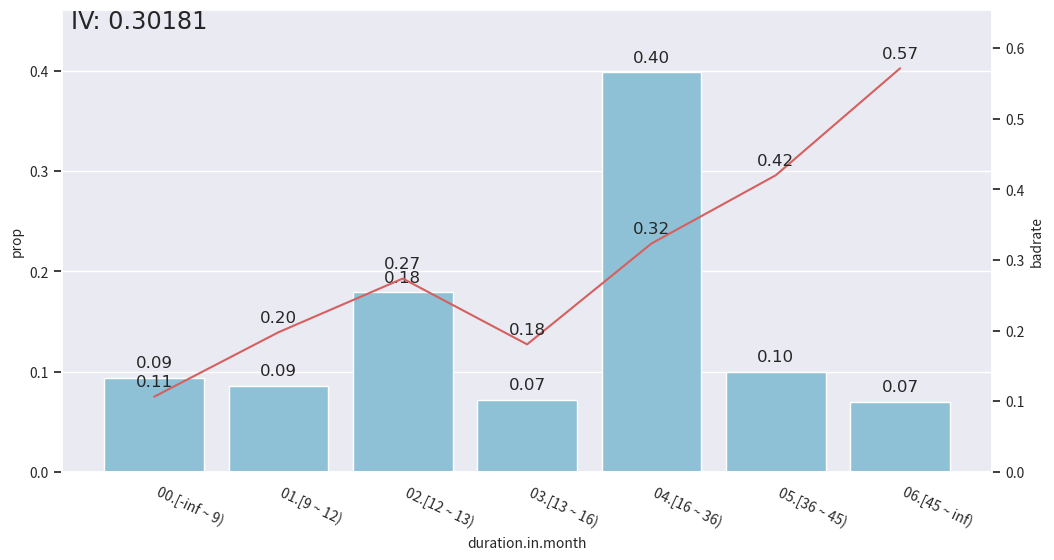

In [32]:
# 导入pyplot包
import matplotlib.pyplot as plt
# Matplotlib 绘图直接嵌入到 Notebook 的输出单元中
%matplotlib inline
'''
Toad是一个功能强大的Python库，专为数据分析、特征工程和信用评分等任务设计。它提供了一系列便捷的工具，帮助数据科学家和分析师高效地进行数据预处理、探索性数据分析（EDA）、特征选择与转换，以及模型评估等工作。
'''
from toad.plot import bin_plot
c2 = toad.transform.Combiner()
temp_data = data[['duration.in.month','creditability']]
c2.fit(temp_data, y = 'creditability', method = 'chi', n_bins = 7)
transformed = c2.transform(temp_data, labels = True)

# 传给bin_plot的数据必须是分箱转化后的
bin_plot(transformed, x = 'duration.in.month', target = 'creditability')


In [33]:
'''
上图中柱形图标志每一箱的占比，折线图表示每一箱的坏样本率，一般折线图要呈现出单调的趋势
可以通过调整箱数实现单调趋势
'''
c2 = toad.transform.Combiner()

temp_data = data[['duration.in.month','creditability']]
c2.fit(temp_data, y = 'creditability', method = 'chi', n_bins = 5)

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

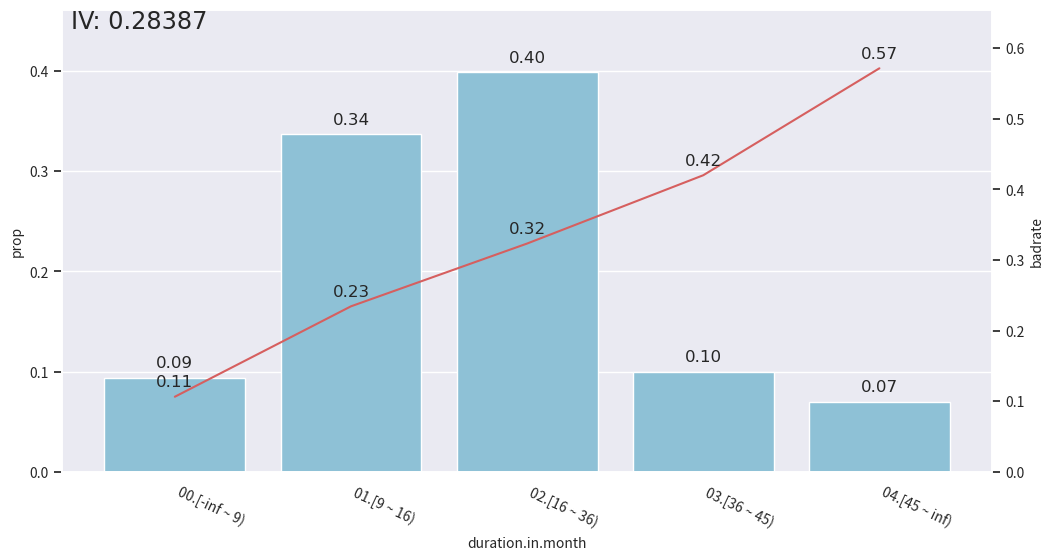

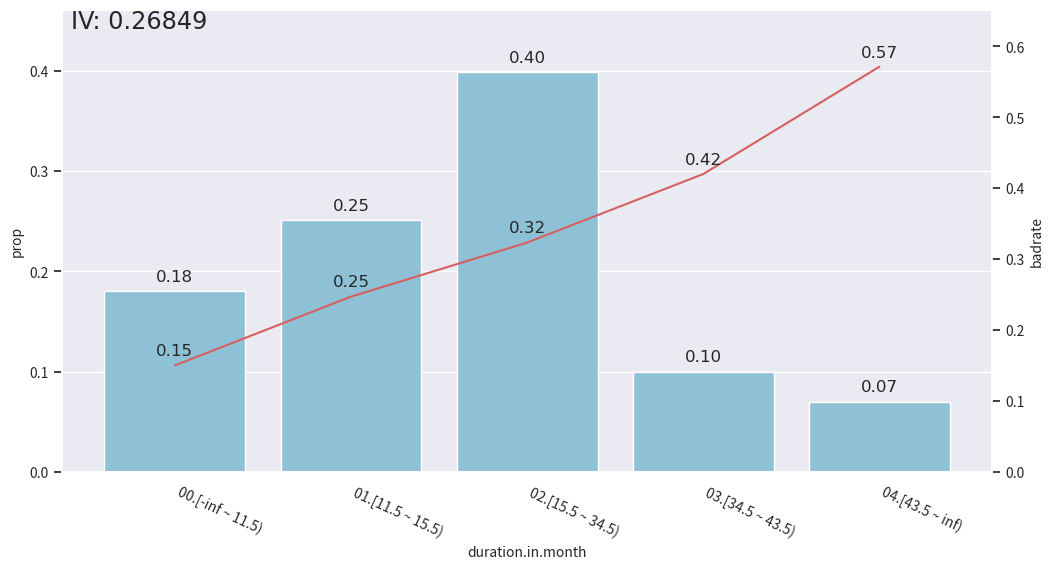

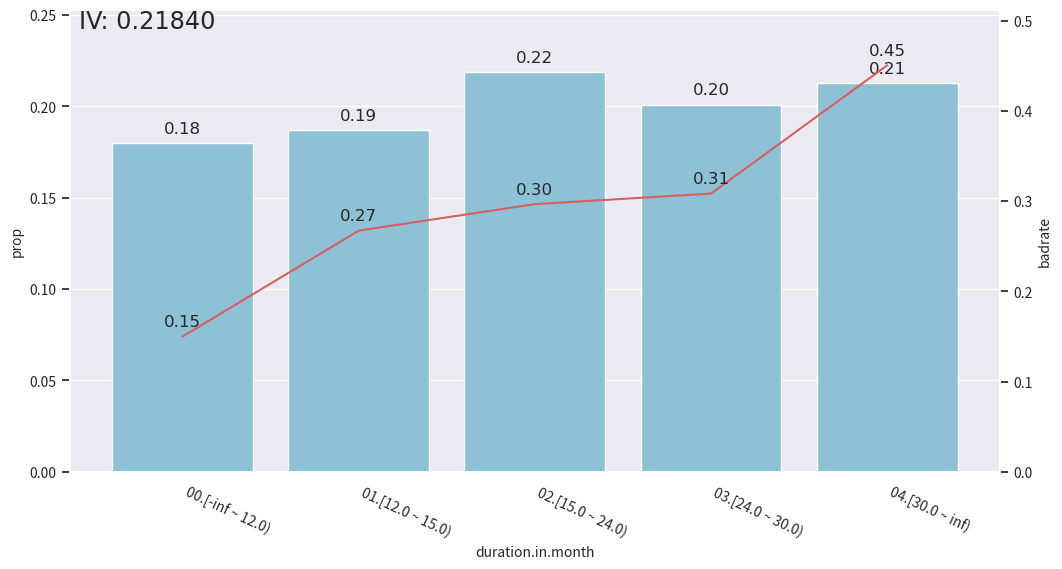

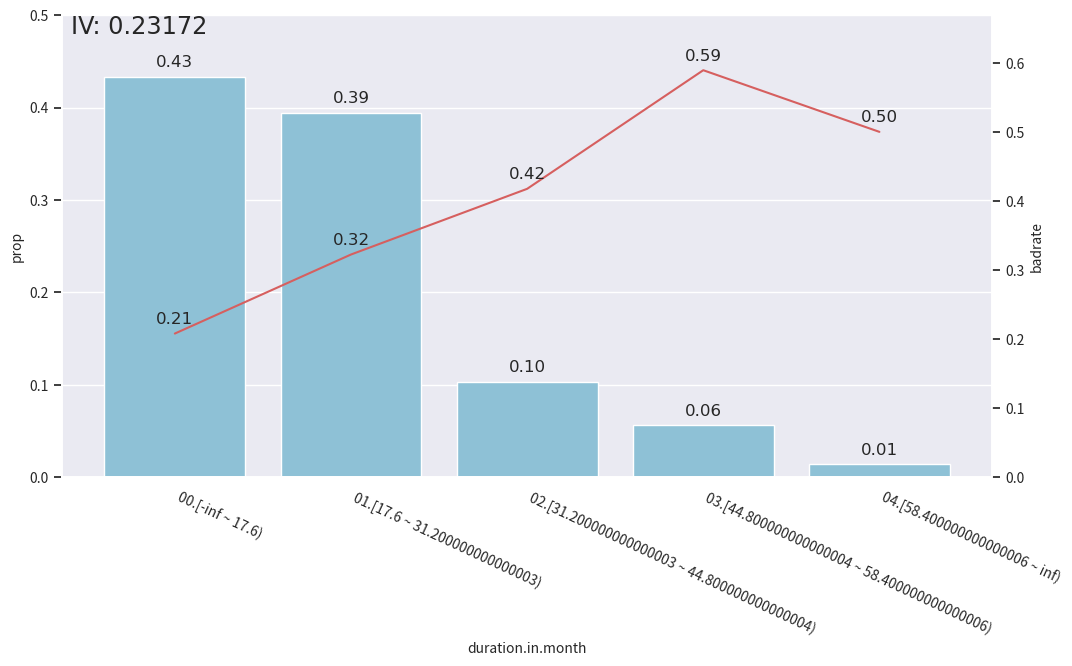

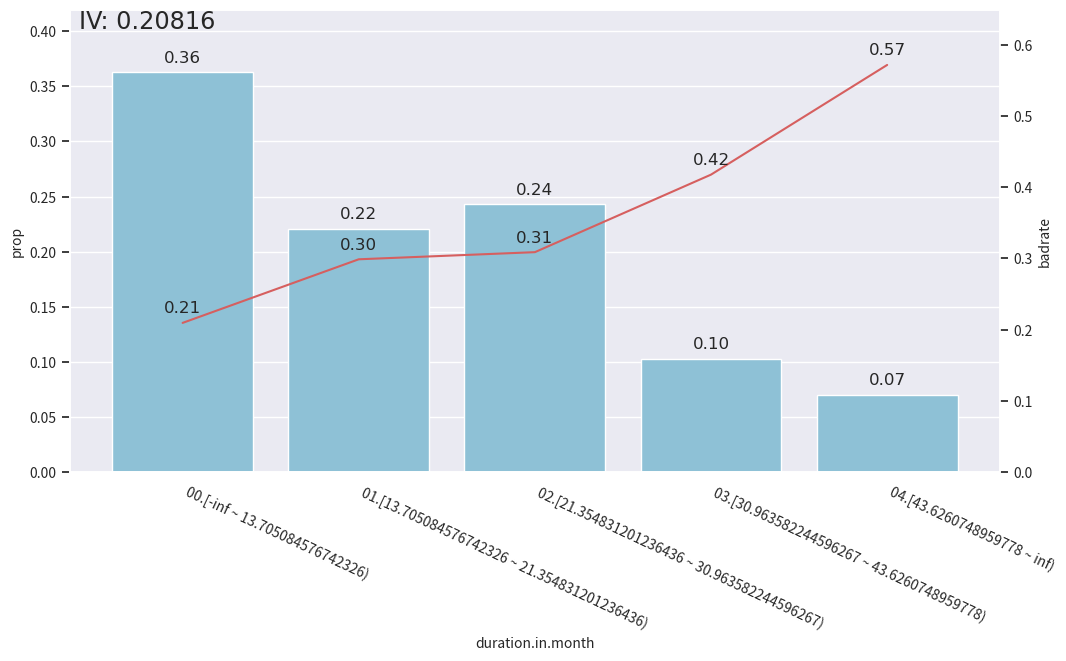

In [40]:
'''
其它分箱方法：聚类分箱（k-means), 决策树分箱，等频分箱，等距分箱
各种分箱方法对比

'chi'：卡方分箱。这种方法通过计算卡方值来确定分箱的边界，使得每个箱内的样本在目标变量上的分布尽可能均匀。
'dt'：决策树分箱。这种方法使用决策树算法来确定分箱的边界，通常可以得到更自然的分箱结果。
'quantile'：分位数分箱。这种方法将数据按照分位数进行分箱，每个箱内的样本数量大致相等。
'step'：等宽分箱。这种方法将数据按照等宽的区间进行分箱，每个箱的宽度相同。
'kmeans'：K均值分箱。这种方法使用 K均值聚类算法来确定分箱的边界，可以得到较为均衡的分箱结果。
'''
for method in ['chi', 'dt', 'quantile', 'step', 'kmeans']:
    c2 = toad.transform.Combiner()
    temp_data = data[['duration.in.month','creditability']]
    c2.fit(temp_data, y = 'creditability', method = method, n_bins = 5)

    c2.transform(temp_data, labels = True)
    '''
    toad.plot.bin_plot(frame, x=None, target='target', iv=True, annotate_format='.2f', return_frame=False, figsize=(12, 6))
    frame：分箱后的数据框。
    x：用于 x 轴的列名。
    target：目标列名，默认为 'target'。
    iv：是否显示 IV 值，默认为 True。
    annotate_format：用于轴注释的格式字符串，默认为 '.2f'。
    return_frame：是否返回分箱数据框，默认为 False。
    figsize：图表的大小，默认为 (12, 6)。
    
    '''
    bin_frame = c2.transform(temp_data, labels = True)
    bin_plot(bin_frame, x = 'duration.in.month', target = 'creditability')

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='value', ylabel='proportion'>

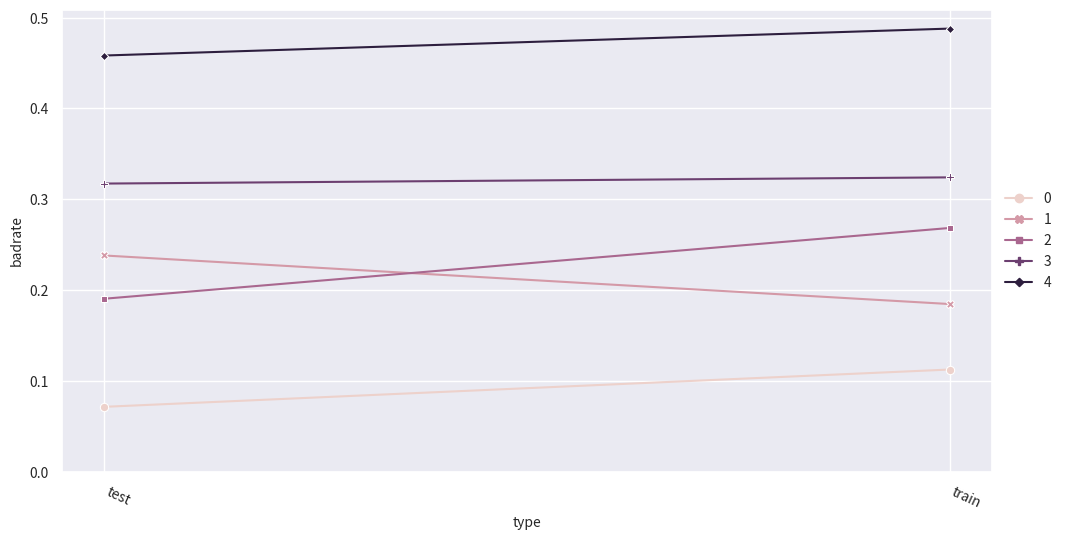

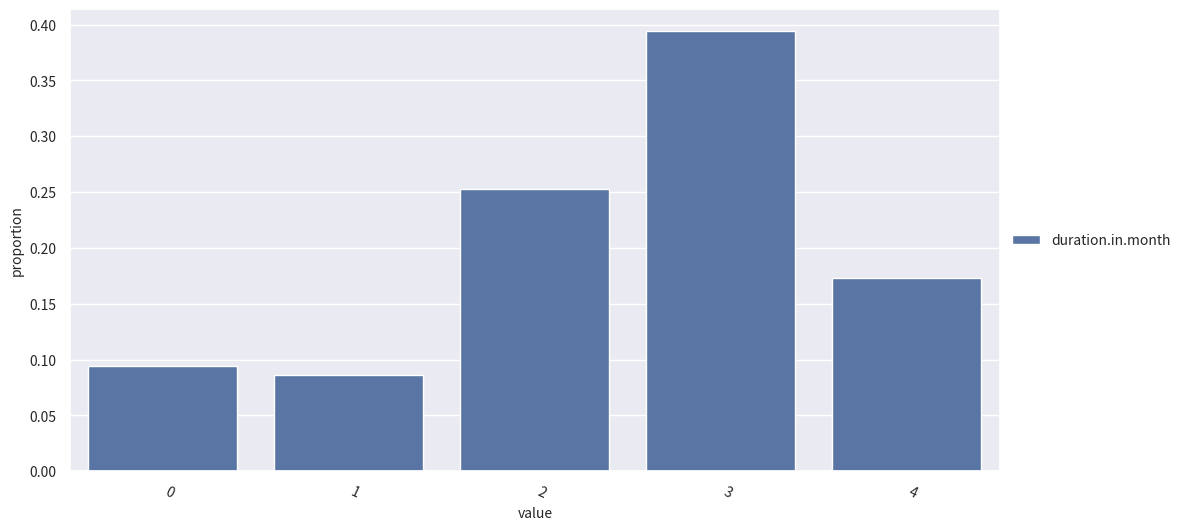

In [52]:
from sklearn.model_selection import train_test_split


x = data.drop('creditability',axis=1)
y = data['creditability']
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.25, random_state = 450)
data_train = pd.concat([X_train, Y_train], axis = 1)

# 增加一列区分训练/测试的特征
data_train['type'] = 'train'
data_test = pd.concat([X_test,Y_test],axis=1)
data_test['type'] = 'test'

# 设置分箱边界
adj_bin = {'duration.in.month': [9, 12, 18, 33]}

c2 = toad.transform.Combiner()
c2.set_rules(adj_bin)

data_ = pd.concat([data_train, data_test], axis = 0)
# 分箱
temp_data = c2.transform(data_[['duration.in.month','creditability','type']])

# 绘制badrate_plot图
from toad.plot import badrate_plot, proportion_plot
badrate_plot(temp_data, target = 'creditability', x = 'type', by = 'duration.in.month')

# 绘制每一箱占比情况图
proportion_plot(temp_data['duration.in.month'])

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='type', ylabel='badrate'>

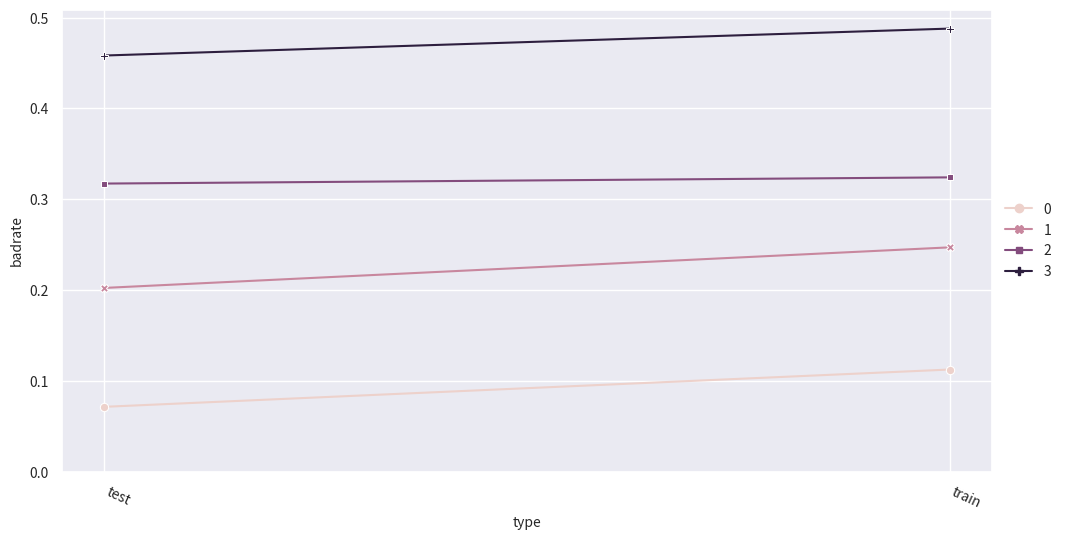

In [53]:
# 上面第一张图中的第一箱和第二箱的bad_rate存在倒挂，说明bad_rate不单调，需要调整。可以将第一箱和第二箱进行合并

# 嘉定将第一箱、第二箱合并
adj_bin = {'duration.in.month': [9,18,33]}
c2.set_rules(adj_bin)

temp_data = c2.transform(data_[['duration.in.month','creditability','type']])
badrate_plot(temp_data, target = 'creditability', x = 'type', by = 'duration.in.month')

In [54]:
# 将特征值转化为分箱的箱号
binned_data = c2.transform(data_train)

# 计算WOE
transer = toad.transform.WOETransformer()
'''

WOE理解：当前组中好用户和坏用户的比值与所有样本中这个比值的差异。差异通过对这两个比值取对数来表示
WOE越大，差异越大，这个分组里的好用户的可能性就越大
WOE越小，差异越小，这个分组里的好用户的可能性也就越小。
分箱结果对WOE结果有直接影响，分箱不同，WOE映射值也会有很大的不同
箱的总数在5～10箱（可以适当调整，通常不超过10箱）
并且将每一箱之间的负样本占比差值尽可能大作为箱合并的基本原则
每一箱的样本量不能小于整体样本的5%，原则是每一箱的频数需要具有统计意义
三种encoding的利弊

'''

# 对WOE的值进行转化，映射到元数据集上，对训练集使用fit_transform, 测试集使用transform
data_tr_woe = transer.fit_transform(binned_data, binned_data['creditability'], exclude=['creditability','type'])
data_tr_woe.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability,type
569,0.786313,0.786622,0.046896,-0.384125,0.834631,0.244802,0.002898,-0.056341,0.355058,-0.014765,...,-0.030366,-0.157497,-0.174441,0.039485,0.002648,0.012822,0.001722,0.043742,1,train
574,0.363027,-0.279729,0.046896,-0.384125,0.834631,0.244802,-0.173326,0.154169,-0.212356,-0.014765,...,-0.418132,-0.157497,-0.174441,-0.053488,-0.298467,0.012822,-0.001130,0.043742,0,train
993,0.786313,0.786622,0.046896,0.141484,0.834631,0.244802,0.534527,0.154169,-0.212356,-0.014765,...,-0.146198,-0.157497,-0.174441,0.039485,0.309621,0.012822,0.001722,0.043742,0,train
355,0.363027,0.099812,0.046896,0.272947,0.834631,0.244802,0.399313,0.154169,-0.212356,-0.014765,...,0.777473,0.723406,-0.174441,0.039485,-0.298467,0.012822,-0.001130,0.043742,1,train
508,-1.072960,0.099812,0.046896,-0.384125,0.141484,0.244802,0.002898,0.154169,-0.302447,-0.014765,...,0.275016,-0.157497,-0.174441,0.039485,0.002648,0.012822,-0.001130,0.043742,0,train


In [43]:
data.drop('creditability',axis=1)

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,present.residence.since,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,... < 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,female : divorced/separated/married,none,4,building society savings agreement/ life insur...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,no checking account,12,existing credits paid back duly till now,radio/television,804,... < 100 DM,... >= 7 years,4,male : single,none,4,"car or other, not in attribute Savings account...",38,none,own,1,skilled employee / official,1,none,yes
998,... < 0 DM,45,existing credits paid back duly till now,radio/television,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal length (cm)', ylabel='prop'>

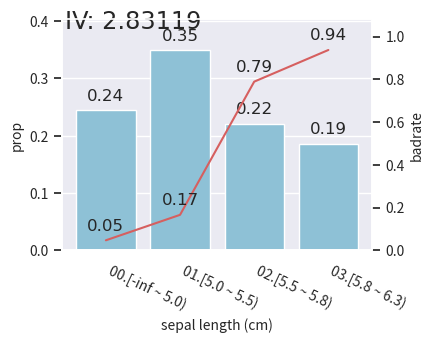

In [38]:
import toad
import pandas as pd
from sklearn.datasets import load_iris

# 数据载入
iris = load_iris()
target = iris['target']
iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris['target'] = target

# 分箱
c = toad.transform.Combiner()
c.fit(iris, y='target', method='chi', min_samples=0.05)

# 画分箱图
from toad.plot import bin_plot
col = 'sepal length (cm)'
bin_plot(c.transform(iris[[col, 'target']], labels=True), x=col, target='target', figsize = [4, 3])